<a href="https://colab.research.google.com/github/Laxmi884/Ineuron-end-to-end-project/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
#Reading the data
df = pd.read_csv("/content/drive/MyDrive/Datasets/default of credit card clients (1).csv")

In [ ]:
# removing the first row from the dataset as it contains false value
df.drop([0],axis=0,inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
df['default payment next month'].isnull().sum()

0

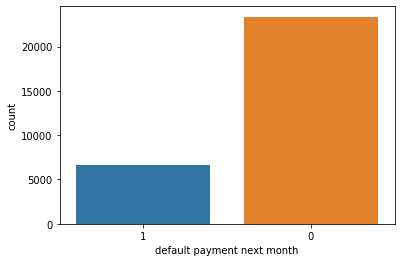

In [ ]:
sns.countplot(x=df['default payment next month'])

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
#Inspecting Data types of the columns
df.dtypes

ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [ ]:
df_new=df.astype(float)

In [ ]:
# converting datatype from object to float
df_new.dtypes

ID                            float64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month    float64
dtype: object

In [ ]:
df_new.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Caluating 2 new columns(Dimensionality reduction) Total_Credit_Used = sum of credit used in last 6 and Total_Payed_Amount = sum of amount paid in last 6
df_new['Total_Credit_Used'] = df_new['BILL_AMT1']+ df_new['BILL_AMT2']+df_new['BILL_AMT3']+df_new['BILL_AMT4']+df_new['BILL_AMT5']+df_new['BILL_AMT6']
columns_to_sum_pay_amt = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df_new['Total_Payed_Amount'] = df_new[columns_to_sum_pay_amt].sum(axis=1)

In [ ]:
#Calculating percentage of amount paid in last 6 months
df_new['Percentage_paid_last_6_months'] = round(df_new['Total_Payed_Amount']/df_new['Total_Credit_Used'],3)

In [ ]:
df_new['Percentage_paid_last_6_months'].fillna(0,inplace = True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             30000 non-null  float64
 1   LIMIT_BAL                      30000 non-null  float64
 2   SEX                            30000 non-null  float64
 3   EDUCATION                      30000 non-null  float64
 4   MARRIAGE                       30000 non-null  float64
 5   AGE                            30000 non-null  float64
 6   PAY_0                          30000 non-null  float64
 7   PAY_2                          30000 non-null  float64
 8   PAY_3                          30000 non-null  float64
 9   PAY_4                          30000 non-null  float64
 10  PAY_5                          30000 non-null  float64
 11  PAY_6                          30000 non-null  float64
 12  BILL_AMT1                      30000 non-null 

In [ ]:
df_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Credit_Used,Total_Payed_Amount,Percentage_paid_last_6_months
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,7704.0,689.0,0.089
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,17077.0,5000.0,0.293
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,101653.0,11018.0,0.108
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,231334.0,8388.0,0.036
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,109339.0,59049.0,0.540


In [ ]:
df_rd = df_new.copy()

In [ ]:
df_rd.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Total_Credit_Used', 'Total_Payed_Amount',
       'Percentage_paid_last_6_months'],
      dtype='object')

In [ ]:
df_rd.drop(columns=['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','Total_Credit_Used', 'Total_Payed_Amount'],inplace=True)

In [ ]:
df_rd.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default payment next month', 'Percentage_paid_last_6_months'],
      dtype='object')

In [ ]:
df_rd = df_rd[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
       , 'Percentage_paid_last_6_months','default payment next month']]

In [ ]:
df_rd.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Percentage_paid_last_6_months,default payment next month
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.089,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.293,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.540,0.0


In [ ]:
df_rd.shape

(30000, 14)

In [ ]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             30000 non-null  float64
 1   LIMIT_BAL                      30000 non-null  float64
 2   SEX                            30000 non-null  float64
 3   EDUCATION                      30000 non-null  float64
 4   MARRIAGE                       30000 non-null  float64
 5   AGE                            30000 non-null  float64
 6   PAY_0                          30000 non-null  float64
 7   PAY_2                          30000 non-null  float64
 8   PAY_3                          30000 non-null  float64
 9   PAY_4                          30000 non-null  float64
 10  PAY_5                          30000 non-null  float64
 11  PAY_6                          30000 non-null  float64
 12  Percentage_paid_last_6_months  30000 non-null 

In [ ]:
correlation=df_rd.corr().round(2)

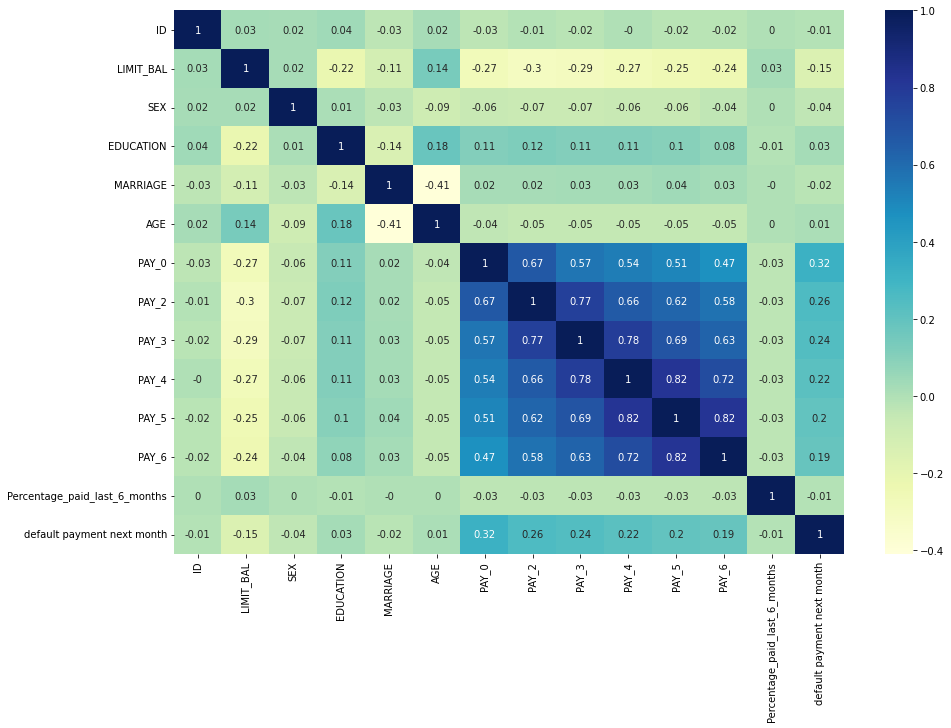

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

In [ ]:
df_rd = df_rd.reset_index()

In [ ]:
df_rd.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Percentage_paid_last_6_months,default payment next month
0,1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0.089,1
1,2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,0.293,1
2,3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108,0
3,4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036,0
4,5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.540,0


In [ ]:
df_rd=df_rd.astype({'default payment next month':'int32'})

In [ ]:
df_rd.describe()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Percentage_paid_last_6_months,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29925.000000,30000.000000
mean,15000.500000,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.381896,0.221200
std,8660.398374,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,7.680589,0.415062
min,1.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-546.929000,0.000000
25%,7500.750000,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.041000,0.000000
50%,15000.500000,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086000,0.000000
75%,22500.250000,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.589000,0.000000
max,30000.000000,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,797.000000,1.000000


In [ ]:
df_rd.dtypes

index                              int64
ID                               float64
LIMIT_BAL                        float64
SEX                              float64
EDUCATION                        float64
MARRIAGE                         float64
AGE                              float64
PAY_0                            float64
PAY_2                            float64
PAY_3                            float64
PAY_4                            float64
PAY_5                            float64
PAY_6                            float64
Percentage_paid_last_6_months    float64
default payment next month         int32
dtype: object

In [ ]:
df_rd.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
dependent_variable = df_rd['default payment next month']
independent_variable = df_rd[[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
       , 'Percentage_paid_last_6_months']]

In [ ]:
np.isinf(independent_variable.any())

False

In [ ]:
np.isnan(independent_variable.any())

False

In [ ]:
X = independent_variable.copy()
Y = dependent_variable.copy()

In [ ]:
#test vs training set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state=1)


In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(24000, 12) (24000,)
(6000, 12) (6000,)


# Training Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
Y_train = Y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
Y_test = Y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,Y_train)
test_accuracy_rf = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9974583333333333
The accuracy on test data is  0.8061666666666667


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,Y_test)
test_precision_score_rf = precision_score(test_class_preds,Y_test)
test_recall_score_rf = recall_score(test_class_preds,Y_test)

In [ ]:
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The accuracy on test data is  0.8061666666666667
The precision on test data is  0.35602094240837695
The recall on test data is  0.6118251928020566


In [ ]:
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.1s
[CV] END max_depth=4

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
train_class_preds1 = rf_grid.predict(X_train)
test_class_preds1 = rf_grid.predict(X_test)
train_accuracy_rf1 = accuracy_score(train_class_preds,Y_train)
test_accuracy_rf1 = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_rf1)
print("The accuracy on test data is ", test_accuracy_rf1)

The accuracy on train data is  0.9974583333333333
The accuracy on test data is  0.8061666666666667


In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds1,Y_test)
test_precision_score_rf = precision_score(test_class_preds1,Y_test)
test_recall_score_rf = recall_score(test_class_preds1,Y_test)

In [ ]:
print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The accuracy on test data is  0.821
The precision on test data is  0.34854151084517576
The recall on test data is  0.6965620328849028
